In [1]:
import numpy as np
import pymc3 as pm
import theano.tensor as tt
count_data=np.loadtxt("C:/bayes/Chapter1_Introduction/data/txtdata.csv")
n_count_data=len(count_data)

print(count_data)


[13. 24.  8. 24.  7. 35. 14. 11. 15. 11. 22. 22. 11. 57. 11. 19. 29.  6.
 19. 12. 22. 12. 18. 72. 32.  9.  7. 13. 19. 23. 27. 20.  6. 17. 13. 10.
 14.  6. 16. 15.  7.  2. 15. 15. 19. 70. 49.  7. 53. 22. 21. 31. 19. 11.
 18. 20. 12. 35. 17. 23. 17.  4.  2. 31. 30. 13. 27.  0. 39. 37.  5. 14.
 13. 22.]


In [6]:
with pm.Model() as model:
    alpha=1.0/count_data.mean()
    tau1=pm.DiscreteUniform('tau1',lower=0,upper=n_count_data-1)
    tau2=pm.DiscreteUniform('tau2',lower=tau1,upper=n_count_data)
    lambda_1=pm.Exponential('lambda_1',alpha)
    lambda_2=pm.Exponential('lambda_2',alpha)
    lambda_3=pm.Exponential('lambda_3',alpha)


In [8]:
with model:
    date=np.arange(n_count_data)
    lambda__= pm.math.switch(tau2>date,lambda_2,lambda_3)
    lambda_ = pm.math.switch(tau1>date,lambda_1,lambda__)
    

In [9]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [10]:
from matplotlib import pyplot as plt
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)
    print(trace)




Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [lambda_3]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
>Metropolis: [tau2]
>Metropolis: [tau1]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████| 60000/60000 [00:28<00:00, 2072.40draws/s]
The number of effective samples is smaller than 10% for some parameters.


<MultiTrace: 4 chains, 10000 iterations, 8 variables>


C:\Users\22114\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\22114\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\22114\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\22114\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\22114\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C582AF400>,
      dtype=object)

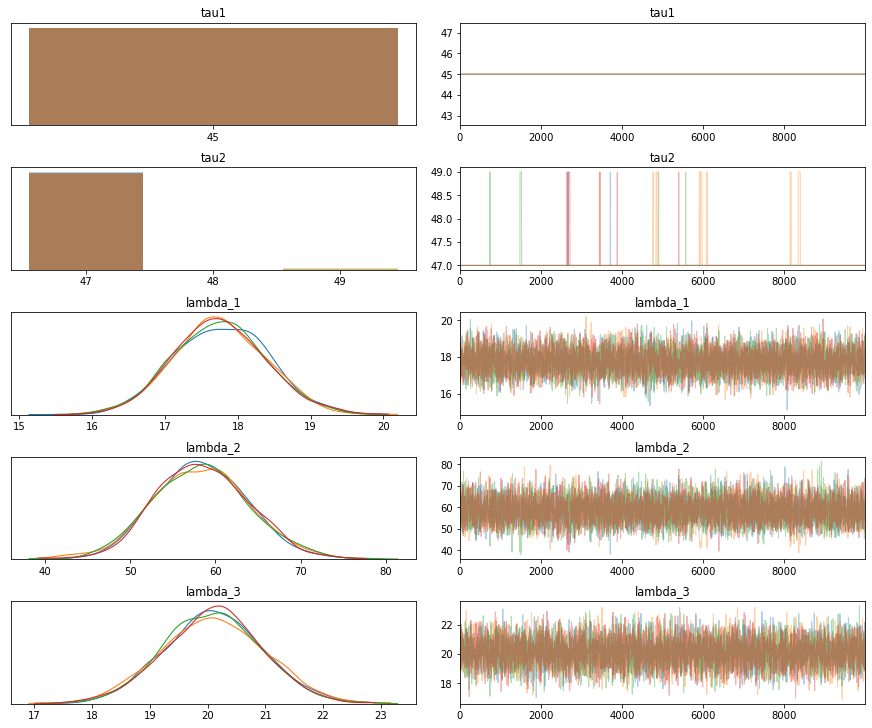

In [12]:

pm.traceplot(trace)

In [55]:

print(lambda_1_samples.mean())
print(lambda_2_samples.mean())
print(tau_samples.mean())

17.748966043251105
22.705205548346505
44.28355


In [56]:
sampes=(lambda_2_samples-lambda_1_samples)/lambda_1_samples
print(sampes.mean())

0.2809168221913266
